In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
df=pd.read_csv("cars_engage_2022.csv")
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1276, 141)

In [4]:
originalFeatures=df.columns
print('originalFeatures count',len(originalFeatures))
print('originalFeatures', originalFeatures)

originalFeatures count 141
originalFeatures Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


### Here if we observe we have too many features(141) so here by we have to move forward by selecting the necessary features which could result in for good analysis and eliminate remaining by with respective the criteriawe can get 

In [5]:

df[df.columns[0:60]].isna().sum() #here we can get more columns which are having minimum missing values so that they can be an accurate measure to use and analyse

Unnamed: 0                           0
Make                                75
Model                                0
Variant                              0
Ex-Showroom_Price                    0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Drivetrain                           7
Cylinder_Configuration              13
Emission_Norm                       11
Engine_Location                     43
Fuel_System                          8
Fuel_Tank_Capacity                  69
Fuel_Type                            0
Height                               1
Length                               0
Width                               12
Body_Type                            6
Doors                                4
City_Mileage                       555
Highway_Mileage                    800
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Kerb_Weight                        365
Gears                    

In [6]:
df[df.columns[60:120]].isna().sum()#in the following columns we can find some useful columns with less missing and there are also columns which are not appropriate for data analysis since they are having more missing values

Central_Locking                               149
Child_Safety_Locks                             75
Clock                                         134
Cup_Holders                                    41
Distance_to_Empty                             243
Door_Pockets                                  117
Engine_Malfunction_Light                      117
Extended_Warranty                             661
FM_Radio                                      249
Fuel-lid_Opener                                14
Fuel_Gauge                                     39
Handbrake                                      57
Instrument_Console                             14
Low_Fuel_Warning                               36
Minimum_Turning_Radius                        381
Multifunction_Display                          89
Sun_Visor                                      62
Third_Row_AC_Vents                            366
Ventilation_System                             35
Auto-Dimming_Rear-View_Mirror                 620


In [7]:

df[df.columns[120:141]].isna().sum()#here there are many missing data so these columns would not be appropriate for the analysis

Tyre_Pressure_Monitoring_System        936
Rear_Center_Armrest                    559
iPod_Compatibility                     663
ESP_(Electronic_Stability_Program)     779
Cooled_Glove_Box                       645
Recommended_Tyre_Pressure             1266
Heated_Seats                          1010
Turbocharger                           618
ISOFIX_(Child-Seat_Mount)              666
Rain_Sensing_Wipers                    798
Paddle_Shifters                        972
Leather_Wrapped_Steering               689
Automatic_Headlamps                    774
Engine_Type                           1242
ASR_/_Traction_Control                 834
Cruise_Control                         727
USB_Ports                             1247
Heads-Up_Display                      1225
Welcome_Lights                        1207
Battery                               1263
Electric_Range                        1259
dtype: int64

By observing the data set there is a possible thing to handle missing values of some essential columns 'Make' and 'ARAI_Certified_Mileage_for_CNG ' only by merging them with its corresponding columns ([ 'Make' and 'Model'] and ['ARAI_Certified_Mileage_for_CNG' and 'ARAI_Certified_Mileage'])
 These new columns would be really helpful for differentiating cars and not loosing an important feature milage for CNG cars 

In [8]:
df['Car']= df['Make'].fillna('')+' '+df['Model']

df


,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Car
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City


In [9]:
def rmissingvaluecol(df, threshold):
    l = []
    l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (df.shape[1] - len(l)))
    print("Columns:\n", list(set(list((df.columns.values))) - set(l)))
    return l


rmissingvaluecol(df,30) # Here threshold is 30% which means we are going to drop columns having more than 30% of missing values


# Columns having more than 30 percent missing values:  56
Columns:
 ['Lane_Watch_Camera/_Side_Mirror_Camera', 'Front_Track', 'Tyre_Pressure_Monitoring_System', 'Basic_Warranty', 'ASR_/_Traction_Control', 'Android_Auto', 'Start_/_Stop_Button', 'Welcome_Lights', 'City_Mileage', 'Extended_Warranty', 'Heads-Up_Display', 'Cooled_Glove_Box', 'Infotainment_Screen', 'Cruise_Control', 'Heated_Seats', 'EBA_(Electronic_Brake_Assist)', 'ISOFIX_(Child-Seat_Mount)', 'ESP_(Electronic_Stability_Program)', 'Paddle_Shifters', 'Ambient_Lightning', 'Apple_CarPlay', 'ARAI_Certified_Mileage_for_CNG', 'Passenger_Side_Seat-Belt_Reminder', 'Highway_Mileage', 'Rain_Sensing_Wipers', 'Turbocharger', 'Seat_Back_Pockets', 'Voice_Recognition', 'Automatic_Headlamps', 'Second_Row_AC_Vents', 'Leather_Wrapped_Steering', 'Recommended_Tyre_Pressure', 'Other_Specs', 'Other_specs', 'Rear_Center_Armrest', 'High_Speed_Alert_System', 'Average_Speed', 'Power_Seats', 'Electric_Range', 'Auto-Dimming_Rear-View_Mirror', 'USB_Ports'

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\1655196848.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) >= threshold))].columns, 1).columns.values)


['Unnamed: 0',
 'Make',
 'Model',
 'Variant',
 'Ex-Showroom_Price',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'Doors',
 'ARAI_Certified_Mileage',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Bluetooth',
 'Boot-lid_Opener',
 'Boot_Space',
 'CD_/_MP3_/_DVD_Player',
 'Central_Locking',
 'Child_Safety_Locks',
 'Clock',
 'Cup_Holders',
 'Distance_to_Empty',
 'Door_Pockets',
 'Engine_Mal

now we are left with 85 features after removing the features having missing values more than 30% 

[['Make', 
 'Model',
 'Variant',
 'Ex-Showroom_Price',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'Doors',
 'ARAI_Certified_Mileage',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Bluetooth',
 'Boot-lid_Opener',
 'Boot_Space',
 'CD_/_MP3_/_DVD_Player',
 'Central_Locking',
 'Child_Safety_Locks',
 'Clock',
 'Cup_Holders',
 'Distance_to_Empty',
 'Door_Pockets',
 'Engine_Malfunction_Light',
 'FM_Radio',
 'Fuel-lid_Opener',
 'Fuel_Gauge',
 'Handbrake',
 'Instrument_Console',
 'Low_Fuel_Warning',
 'Minimum_Turning_Radius',
 'Multifunction_Display',
 'Sun_Visor',
 'Third_Row_AC_Vents',
 'Ventilation_System',
 'Engine_Immobilizer',
 'ABS_(Anti-lock_Braking_System)',
 'Headlight_Reminder',
 'Adjustable_Headrests',
 'Airbags',
 'Door_Ajar_Warning',
 'EBD_(Electronic_Brake-force_Distribution)',
 'Fasten_Seat_Belt_Warning',
 'Number_of_Airbags',
 'Adjustable_Steering_Column',
 'Parking_Assistance',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Multifunction_Steering_Wheel',
 'Seat_Height_Adjustment',
 'Car']]


 

In [10]:
df.corr()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
Unnamed: 0,1.000000,0.127391,0.021407,-0.087279,0.066246,0.202458,0.085713
Cylinders,0.127391,1.000000,-0.000935,-0.507423,-0.318495,0.458069,-0.241612
Valves_Per_Cylinder,0.021407,-0.000935,1.000000,-0.029962,-0.024687,0.068139,NaN
Doors,-0.087279,-0.507423,-0.029962,1.000000,0.521476,-0.220540,0.472499
Seating_Capacity,0.066246,-0.318495,-0.024687,0.521476,1.000000,-0.011740,0.278574
Number_of_Airbags,0.202458,0.458069,0.068139,-0.220540,-0.011740,1.000000,0.364222
USB_Ports,0.085713,-0.241612,NaN,0.472499,0.278574,0.364222,1.000000


from the following features now we cannot directly go to correlation between features and remove them since the features are of different data type and its not possible to change each and every possible thing to float and find correlation 

So now we have to manually select the features which would make sense from the above 84 features for analysis

'Make','Model','Car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags'

In [11]:
dff=df[['Make','Model','Car','Variant','ARAI_Certified_Mileage','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']]

In [12]:
dff


,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,Tata,Nano Genx,Tata Nano Genx,Xt,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
1,Tata,Nano Genx,Tata Nano Genx,Xe,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
2,Tata,Nano Genx,Tata Nano Genx,Emax Xm,NaN,Hatchback,CNG,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,15 litres,1652 mm,3164 mm,1750 mm,4.0,4.0,2230 mm,NaN
3,Tata,Nano Genx,Tata Nano Genx,Xta,21.9 km/litre,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
4,Tata,Nano Genx,Tata Nano Genx,Xm,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0
1272,Honda,City,Honda City,Zx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1273,Honda,City,Honda City,Zx Cvt Petrol,22.6 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1274,Honda,City,Honda City,V Cvt Petrol,17.8 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0


In [13]:
dff.isnull()

,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1272,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1274,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:

dff['Ex-Showroom_Price']= dff['Ex-Showroom_Price'].str.replace(r'Rs.','')
dff

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2663253023.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Ex-Showroom_Price']= dff['Ex-Showroom_Price'].str.replace(r'Rs.','')
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2663253023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Ex-Showroom_Price']= dff['Ex-Showroom_Price'].str.replace(r'Rs.','')


,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,Tata,Nano Genx,Tata Nano Genx,Xt,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
1,Tata,Nano Genx,Tata Nano Genx,Xe,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
2,Tata,Nano Genx,Tata Nano Genx,Emax Xm,NaN,Hatchback,CNG,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,15 litres,1652 mm,3164 mm,1750 mm,4.0,4.0,2230 mm,NaN
3,Tata,Nano Genx,Tata Nano Genx,Xta,21.9 km/litre,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
4,Tata,Nano Genx,Tata Nano Genx,Xm,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0
1272,Honda,City,Honda City,Zx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1273,Honda,City,Honda City,Zx Cvt Petrol,22.6 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1274,Honda,City,Honda City,V Cvt Petrol,17.8 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0


In [15]:
dff['Ex-Showroom_Price'] = dff['Ex-Showroom_Price'].str.replace(r',', '')
dff

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2561242444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Ex-Showroom_Price'] = dff['Ex-Showroom_Price'].str.replace(r',', '')


,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,Tata,Nano Genx,Tata Nano Genx,Xt,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
1,Tata,Nano Genx,Tata Nano Genx,Xe,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
2,Tata,Nano Genx,Tata Nano Genx,Emax Xm,NaN,Hatchback,CNG,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,15 litres,1652 mm,3164 mm,1750 mm,4.0,4.0,2230 mm,NaN
3,Tata,Nano Genx,Tata Nano Genx,Xta,21.9 km/litre,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
4,Tata,Nano Genx,Tata Nano Genx,Xm,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24 litres,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0
1272,Honda,City,Honda City,Zx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1273,Honda,City,Honda City,Zx Cvt Petrol,22.6 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1274,Honda,City,Honda City,V Cvt Petrol,17.8 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40 litres,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0


In [16]:
dff["Ex-Showroom_Price"] = pd.to_numeric(dff["Ex-Showroom_Price"])


C:\Users\srira\AppData\Local\Temp\ipykernel_25896\1328595635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Ex-Showroom_Price"] = pd.to_numeric(dff["Ex-Showroom_Price"])


In [17]:
dff['Fuel_Tank_Capacity'] = dff['Fuel_Tank_Capacity'].str.replace(r'litres', '')
dff

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\1228527211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Fuel_Tank_Capacity'] = dff['Fuel_Tank_Capacity'].str.replace(r'litres', '')


,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,Tata,Nano Genx,Tata Nano Genx,Xt,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
1,Tata,Nano Genx,Tata Nano Genx,Xe,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
2,Tata,Nano Genx,Tata Nano Genx,Emax Xm,NaN,Hatchback,CNG,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,15,1652 mm,3164 mm,1750 mm,4.0,4.0,2230 mm,NaN
3,Tata,Nano Genx,Tata Nano Genx,Xta,21.9 km/litre,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
4,Tata,Nano Genx,Tata Nano Genx,Xm,23.6 km/litre,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,38PS@5500rpm,51Nm@4000rpm,24,1652 mm,3164 mm,1750 mm,5.0,4.0,2230 mm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0
1272,Honda,City,Honda City,Zx Mt Diesel,25.1 km/litre,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),...,100PS@3600rpm,200Nm@1750rpm,40,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1273,Honda,City,Honda City,Zx Cvt Petrol,22.6 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,6.0
1274,Honda,City,Honda City,V Cvt Petrol,17.8 km/litre,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),...,119PS@6600rpm,145Nm@4600rpm,40,1495 mm,4440 mm,1695 mm,4.0,5.0,2600 mm,2.0


In [18]:
dff['Height'] = dff['Height'].str.replace(r'mm', '')
dff['Length'] = dff['Length'].str.replace(r'mm', '')
dff['Width'] = dff['Width'].str.replace(r'mm', '')
dff['Wheelbase'] = dff['Wheelbase'].str.replace(r'mm', '')
dff['Displacement'] = dff['Displacement'].str.replace(' cc','')
dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].str.replace(' km/litre','')


C:\Users\srira\AppData\Local\Temp\ipykernel_25896\290108126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Height'] = dff['Height'].str.replace(r'mm', '')
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\290108126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Length'] = dff['Length'].str.replace(r'mm', '')
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\290108126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [19]:
HP = dff.Power.str.extract(r'(\d{1,4}).*').astype(float) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = dff.Torque.str.extract(r'(\d{1,4}).*').astype(float)
TQ = TQ.apply(lambda x: round(x,2))
dff.Torque = TQ
dff.Power = HP

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2453537259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.Torque = TQ
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2453537259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.Power = HP


In [20]:
dff['Ex-Showroom_Price'] = dff['Ex-Showroom_Price'].astype(int)

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\2340328995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Ex-Showroom_Price'] = dff['Ex-Showroom_Price'].astype(int)


In [21]:
dff['Height'] = dff['Height'].astype(float)
dff['Length'] = dff['Length'].astype(float)
dff['Width'] = dff['Width'].astype(float)
dff['Wheelbase'] = dff['Wheelbase'].astype(float)
dff['Displacement'] = dff['Displacement'].astype(float)


C:\Users\srira\AppData\Local\Temp\ipykernel_25896\853309928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Height'] = dff['Height'].astype(float)
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\853309928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Length'] = dff['Length'].astype(float)
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\853309928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [22]:
dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].replace('9.8-10.0','10')
dff['ARAI_Certified_Mileage']=dff['ARAI_Certified_Mileage'].replace('10kmpl','10')
dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].replace('22.4-21.9','22.4')




C:\Users\srira\AppData\Local\Temp\ipykernel_25896\3551667202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].replace('9.8-10.0','10')
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\3551667202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['ARAI_Certified_Mileage']=dff['ARAI_Certified_Mileage'].replace('10kmpl','10')
C:\Users\srira\AppData\Local\Temp\ipykernel_25896\3551667202.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [23]:
dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].astype(float)

C:\Users\srira\AppData\Local\Temp\ipykernel_25896\589584128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['ARAI_Certified_Mileage'] = dff['ARAI_Certified_Mileage'].astype(float)


In [24]:
dff = dff[~dff.ARAI_Certified_Mileage.isnull()]
dff = dff[~dff.Make.isnull()]
dff = dff[~dff.Width.isnull()]
dff = dff[~dff.Cylinders.isnull()]
dff = dff[~dff.Wheelbase.isnull()]

dff = dff[~dff['Seating_Capacity'].isnull()]
dff = dff[~dff['Torque'].isnull()]

in place of null values in the airbags column we can replace it with 0 because some cars either have air bags or not 

In [25]:
dff.Number_of_Airbags.fillna(0,inplace= True)

In [26]:
dff.isna().sum()

Make                       0
Model                      0
Car                        0
Variant                    0
ARAI_Certified_Mileage     0
Body_Type                  0
Fuel_Type                  0
Fuel_System                1
Type                       0
Drivetrain                 2
Ex-Showroom_Price          0
Displacement               0
Cylinders                  0
Power                      0
Torque                     0
Fuel_Tank_Capacity        28
Height                     0
Length                     0
Width                      0
Doors                      0
Seating_Capacity           0
Wheelbase                  0
Number_of_Airbags          0
dtype: int64

In [27]:
dff['Fuel_Tank_Capacity']=dff['Fuel_Tank_Capacity'].astype(float)
dff['Fuel_Tank_Capacity']=dff['Fuel_Tank_Capacity'].fillna(dff['Fuel_Tank_Capacity'].mean())

In [28]:
dff.isna().sum()

Make                      0
Model                     0
Car                       0
Variant                   0
ARAI_Certified_Mileage    0
Body_Type                 0
Fuel_Type                 0
Fuel_System               1
Type                      0
Drivetrain                2
Ex-Showroom_Price         0
Displacement              0
Cylinders                 0
Power                     0
Torque                    0
Fuel_Tank_Capacity        0
Height                    0
Length                    0
Width                     0
Doors                     0
Seating_Capacity          0
Wheelbase                 0
Number_of_Airbags         0
dtype: int64

In [29]:
dff.corr()

,ARAI_Certified_Mileage,Ex-Showroom_Price,Displacement,Cylinders,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
ARAI_Certified_Mileage,1.000000,-0.446105,-0.670185,-0.552431,-0.642495,-0.584511,-0.712111,-0.094887,-0.589365,-0.536147,0.311803,0.028948,-0.562228,-0.436347
Ex-Showroom_Price,-0.446105,1.000000,0.758440,0.797455,0.889403,0.700588,0.421461,-0.264324,0.299770,0.392258,-0.474217,-0.362963,0.298273,0.298319
Displacement,-0.670185,0.758440,1.000000,0.878499,0.908923,0.843541,0.779631,-0.074044,0.607688,0.628211,-0.489133,-0.200103,0.601401,0.515211
Cylinders,-0.552431,0.797455,0.878499,1.000000,0.895918,0.765300,0.641449,-0.253198,0.469557,0.511741,-0.520800,-0.376476,0.450883,0.417417
Power,-0.642495,0.889403,0.908923,0.895918,1.000000,0.847722,0.667214,-0.252600,0.514165,0.586593,-0.554002,-0.377425,0.499550,0.499242
Torque,-0.584511,0.700588,0.843541,0.765300,0.847722,1.000000,0.756215,-0.036130,0.653173,0.701340,-0.368276,-0.165063,0.659974,0.564389
Fuel_Tank_Capacity,-0.712111,0.421461,0.779631,0.641449,0.667214,0.756215,1.000000,0.148436,0.750532,0.710587,-0.267414,0.033720,0.777535,0.584744
Height,-0.094887,-0.264324,-0.074044,-0.253198,-0.252600,-0.036130,0.148436,1.000000,0.093229,0.131548,0.565342,0.739801,0.193143,-0.098597
Length,-0.589365,0.299770,0.607688,0.469557,0.514165,0.653173,0.750532,0.093229,1.000000,0.793451,-0.269905,0.110139,0.868530,0.616910
Width,-0.536147,0.392258,0.628211,0.511741,0.586593,0.701340,0.710587,0.131548,0.793451,1.000000,-0.164927,0.002680,0.711987,0.546525


In [30]:
fd=dff

Text(0.5, 1.0, 'Correlation between features')

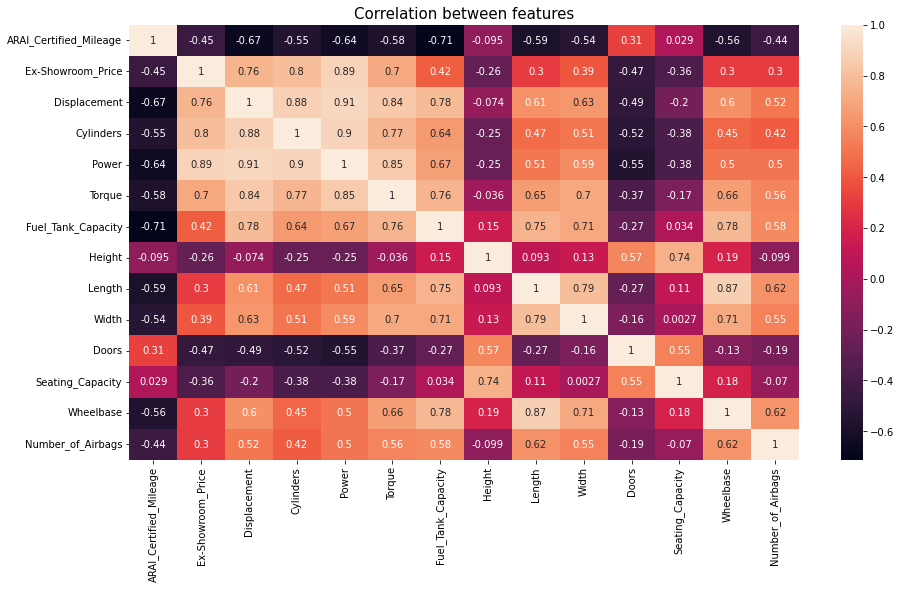

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(fd.corr(), annot=True)
plt.title('Correlation between features',fontsize=15)


##Lets see the variation of price and no of cars in that price range

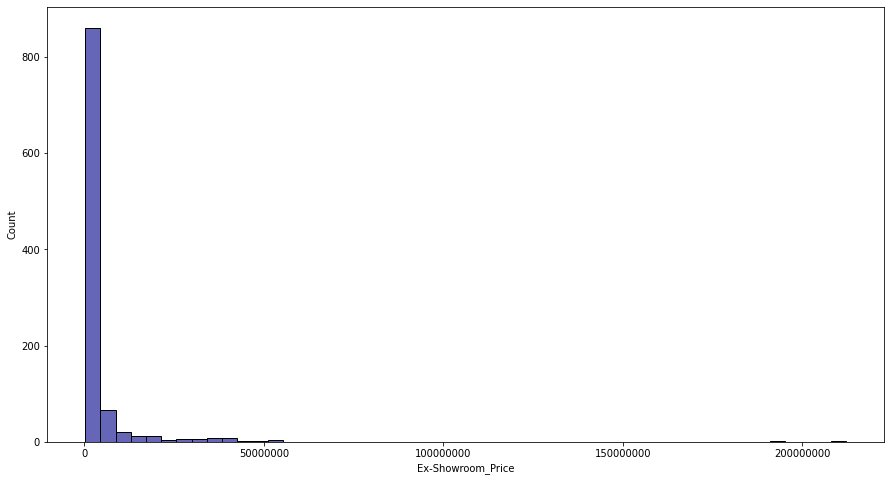

In [32]:
fig=plt.figure(figsize=(15,8))
ax=sns.histplot(data=fd,x='Ex-Showroom_Price', bins=50,alpha=.6, color='darkblue')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()


c:\Users\srira\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


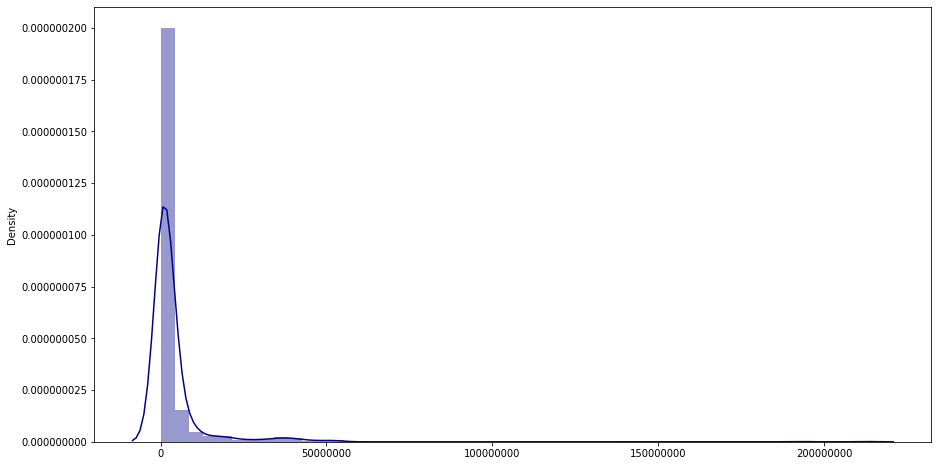

In [33]:
fig=plt.figure(figsize=(15,8))
ax=sns.distplot(x=fd['Ex-Showroom_Price'],  color='darkblue')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()


In [34]:
fd['Doors'].unique()

array([5., 4., 2., 3.])

c:\Users\srira\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\srira\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


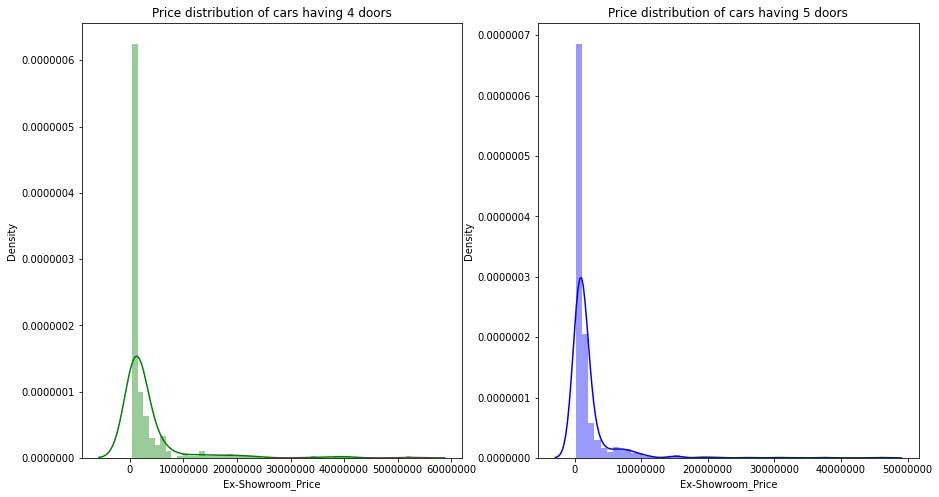

In [35]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(121)
plot=sns.distplot(fd[(fd.Doors== 4)]["Ex-Showroom_Price"],color='g',ax=ax)
ax.set_title('Price distribution of cars having 4 doors')
ax.ticklabel_format(useOffset=False, style='plain')
ax=f.add_subplot(122)
plot=sns.distplot(fd[(fd.Doors == 5)]['Ex-Showroom_Price'],color='b',ax=ax)
ax.set_title('Price distribution of cars having 5 doors')
ax.ticklabel_format(useOffset=False, style='plain')



c:\Users\srira\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\srira\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


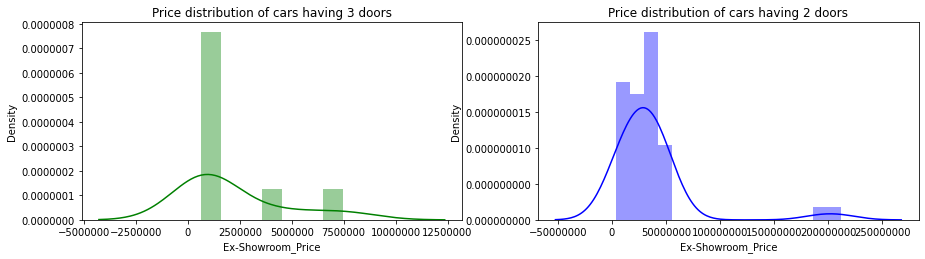

In [36]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(221)
plot=sns.distplot(fd[(fd.Doors== 3)]["Ex-Showroom_Price"],color='g',ax=ax)
ax.set_title('Price distribution of cars having 3 doors')
ax.ticklabel_format(useOffset=False, style='plain')
ax=f.add_subplot(222)
plot=sns.distplot(fd[(fd.Doors == 2)]['Ex-Showroom_Price'],color='b',ax=ax)
ax.set_title('Price distribution of cars having 2 doors')
ax.ticklabel_format(useOffset=False, style='plain')

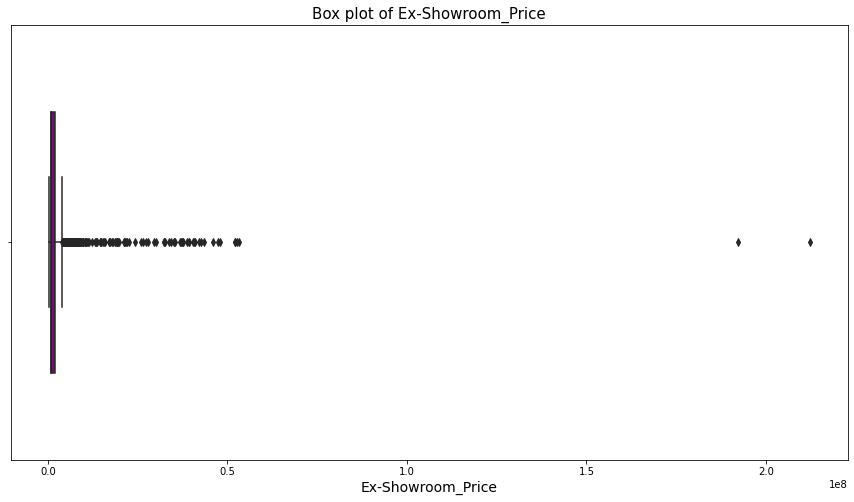

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(data=fd, x='Ex-Showroom_Price',width=.6,color='Purple', hue= 'Fuel_Type')
plt.title('Box plot of Ex-Showroom_Price',fontsize=15)
plt.xlabel('Ex-Showroom_Price',fontsize=14);
plt.style.use('grayscale')

## According to the company

In [38]:
make_distribution=fd.groupby('Make').size()
make_distribution

Make
Aston Martin          2
Audi                 22
Bentley               6
Bmw                  35
Bugatti               2
Datsun               15
Dc                    1
Ferrari               8
Fiat                 23
Force                 4
Ford                 42
Honda                59
Hyundai             101
Isuzu                 5
Jaguar               20
Jeep                 28
Kia                   5
Lamborghini          13
Land Rover            8
Land Rover Rover     11
Lexus                 7
Mahindra            102
Maruti Suzuki       143
Maruti Suzuki R       2
Maserati              6
Mg                    4
Mini                  6
Mitsubishi            7
Nissan               29
Porsche              10
Premier               6
Renault              35
Skoda                43
Tata                 83
Toyota               82
Volkswagen           28
Volvo                12
dtype: int64

<AxesSubplot:title={'center':'Make distribution'}, xlabel='Make'>

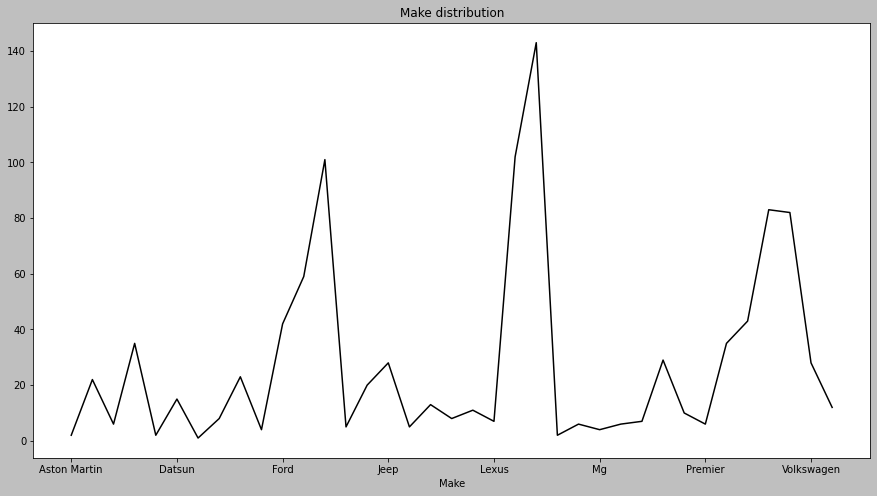

In [39]:
plt.figure(figsize=(15,8))
make_distribution.plot(title= 'Make distribution')

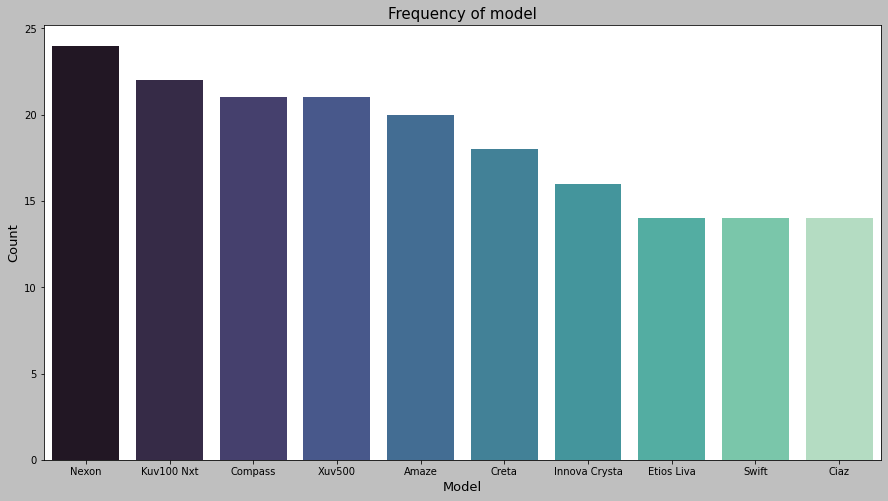

In [40]:
model=fd["Model"].value_counts().reset_index()
model.columns=["model","count"]
plt.figure(figsize=(15,8))
count_of_model = fd['Model'].value_counts()[0:10].sort_values(ascending=False)
sns.countplot(data=fd, x='Model',order=count_of_model.index,palette="mako")
plt.title('Frequency of model',size=15)
plt.xlabel('Model',size=13)
plt.ylabel('Count',size=13)
plt.show()

Text(0.5, 1.0, 'Cars according to their body type')

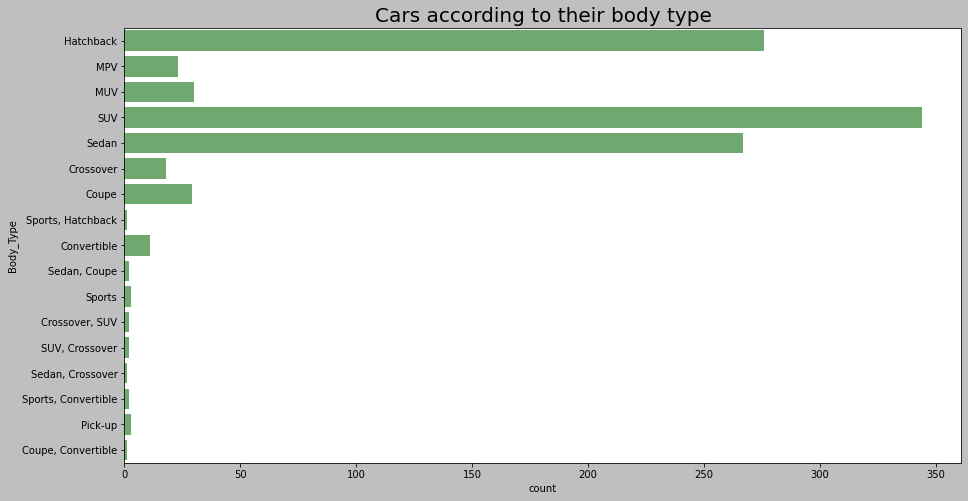

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(data=fd, y='Body_Type',alpha=.6,color='green')
plt.title('Cars according to their body type',fontsize=20)


Text(0, 0.5, 'Body Type')

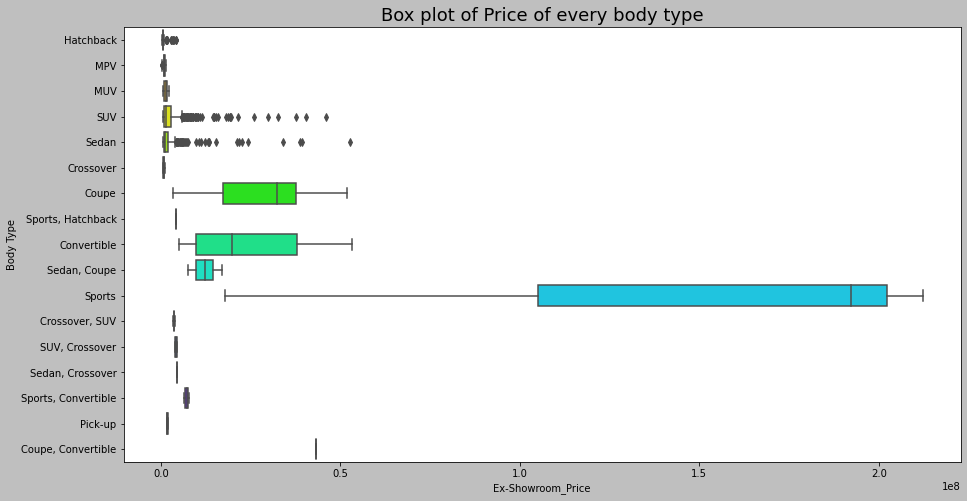

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=fd, x='Ex-Showroom_Price', y='Body_Type', palette='gist_rainbow')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('Body Type')


Text(0, 0.5, 'Fuel type')

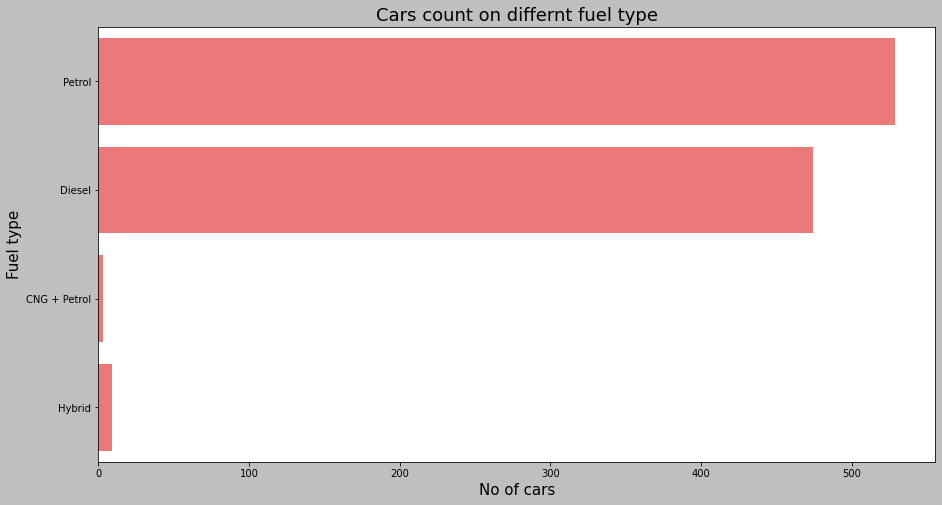

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(data=fd, y='Fuel_Type',alpha=.6, color='r')
plt.title('Cars count on differnt fuel type',fontsize=18)
plt.xlabel('No of cars', fontsize=15)
plt.ylabel('Fuel type', fontsize=15)




Text(0.5, 0, 'Displacement in cc')

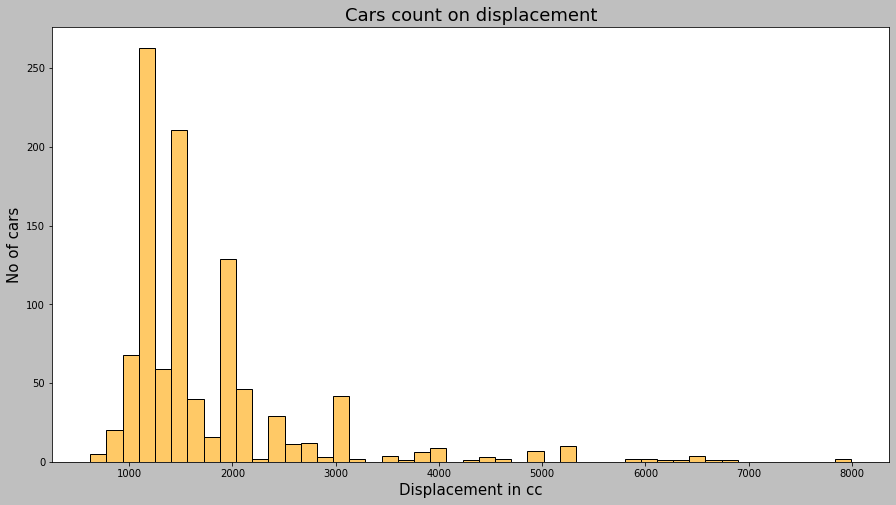

In [44]:
plt.figure(figsize=(15,8))
sns.histplot(data=fd, x='Displacement',alpha=.6, color='orange')
plt.title('Cars count on displacement',fontsize=18)
plt.ylabel('No of cars', fontsize=15)
plt.xlabel('Displacement in cc', fontsize=15)




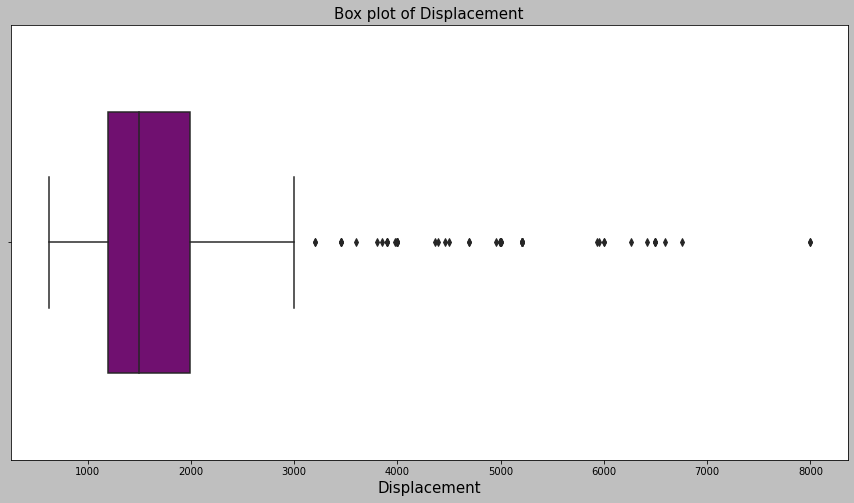

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(data=fd, x='Displacement',width=.6,color='Purple', hue= 'Fuel_Type')
plt.title('Box plot of Displacement',fontsize=15)

plt.xlabel('Displacement',fontsize=15);

## exshowroom price variation vs milage

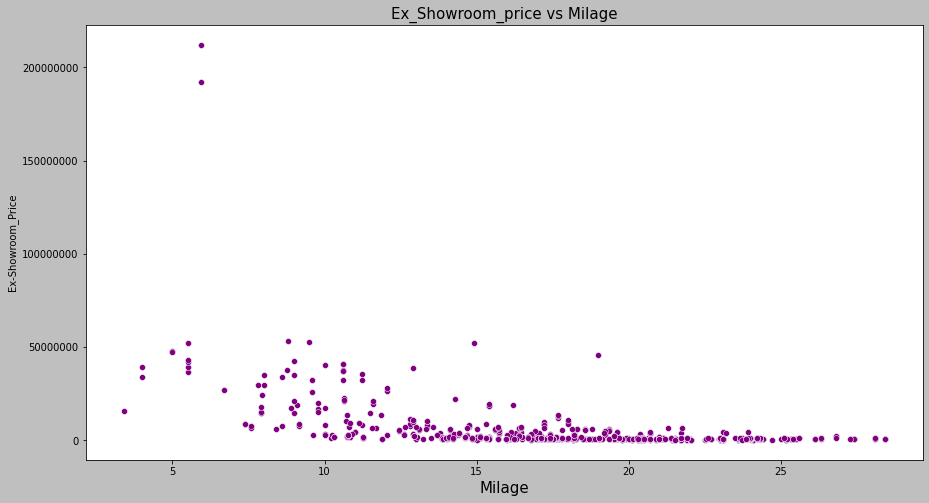

In [46]:
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='ARAI_Certified_Mileage',y='Ex-Showroom_Price',color='Purple')
plt.title('Ex_Showroom_price vs Milage',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Milage',fontsize=15);

##Horse power vs ex showroom price

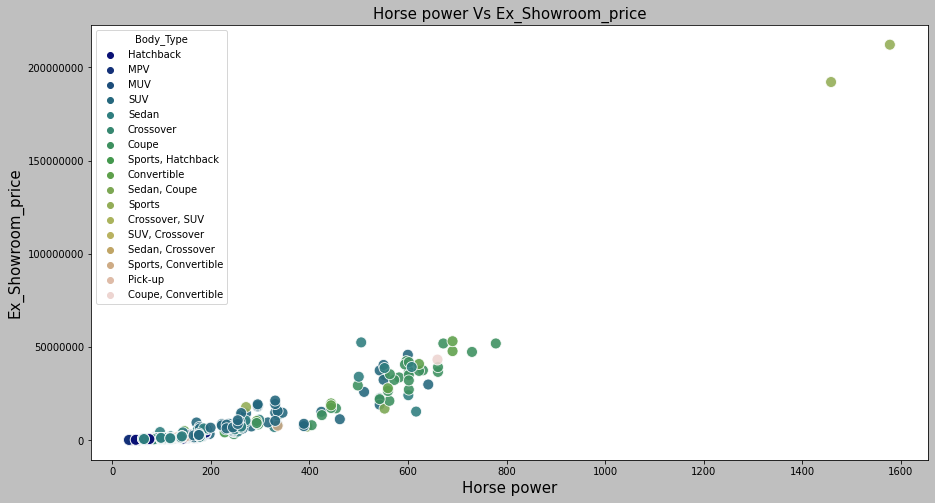

In [47]:
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='Power',y='Ex-Showroom_Price',hue='Body_Type',palette='gist_earth',alpha=.89, s=120 );
plt.title('Horse power Vs Ex_Showroom_price',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Ex_Showroom_price',fontsize=15)
plt.xlabel('Horse power',fontsize=15);

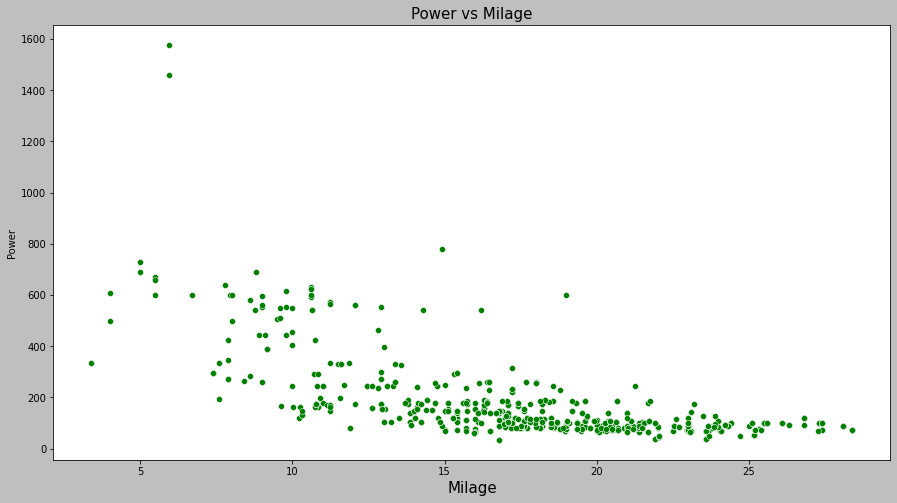

In [48]:
#power vs Milage 
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='ARAI_Certified_Mileage',y='Power',color='g')
plt.title('Power vs Milage',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Milage',fontsize=15);

## lets see some scatter plot grid with variables

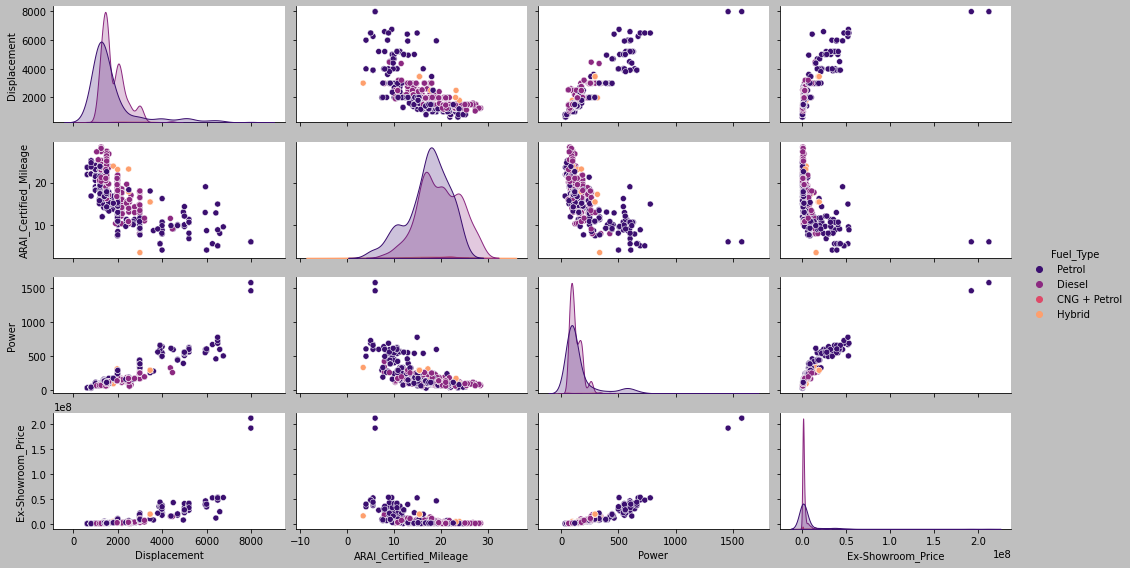

In [49]:
sns.pairplot(fd,vars=[ 'Displacement', 'ARAI_Certified_Mileage', 'Power', 'Ex-Showroom_Price'], hue= 'Fuel_Type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8)

           

# Clustering


In [50]:
from sklearn.cluster import KMeans

In [51]:
cols = [ i for i in fd.columns if fd[i].dtype != 'object']

In [52]:
fd.isna().sum()

Make                      0
Model                     0
Car                       0
Variant                   0
ARAI_Certified_Mileage    0
Body_Type                 0
Fuel_Type                 0
Fuel_System               1
Type                      0
Drivetrain                2
Ex-Showroom_Price         0
Displacement              0
Cylinders                 0
Power                     0
Torque                    0
Fuel_Tank_Capacity        0
Height                    0
Length                    0
Width                     0
Doors                     0
Seating_Capacity          0
Wheelbase                 0
Number_of_Airbags         0
dtype: int64

In [53]:
# k-Means-Clustering
km = KMeans(n_clusters=8,)
clusters = km.fit_predict(fd[cols])
fd['cluster'] = clusters
fd.cluster = (fd.cluster + 1).astype('int64')
fd.head(5)

,Make,Model,Car,Variant,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Fuel_System,Type,Drivetrain,...,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags,cluster
0,Tata,Nano Genx,Tata Nano Genx,Xt,23.6,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,1
1,Tata,Nano Genx,Tata Nano Genx,Xe,23.6,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,1
3,Tata,Nano Genx,Tata Nano Genx,Xta,21.9,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,1
4,Tata,Nano Genx,Tata Nano Genx,Xm,23.6,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),...,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,1
5,Tata,Nano Genx,Tata Nano Genx,Xma,21.9,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),...,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,1


In [54]:
user_input = input('')
x = fd[fd['Model']==user_input]['cluster']
x = list(set(x))
print(x)
q = fd[fd['cluster']==x[0]]
q[['Car','ARAI_Certified_Mileage','Ex-Showroom_Price']]

[1]


,Car,ARAI_Certified_Mileage,Ex-Showroom_Price
0,Tata Nano Genx,23.6,292667
1,Tata Nano Genx,23.6,236447
3,Tata Nano Genx,21.9,334768
4,Tata Nano Genx,23.6,272223
5,Tata Nano Genx,21.9,314815
...,...,...,...
1270,Honda City,25.6,1191000
1271,Honda City,25.1,1302000
1272,Honda City,25.1,1421000
1273,Honda City,22.6,1431000


Text(0, 0.5, 'Manufacturer')

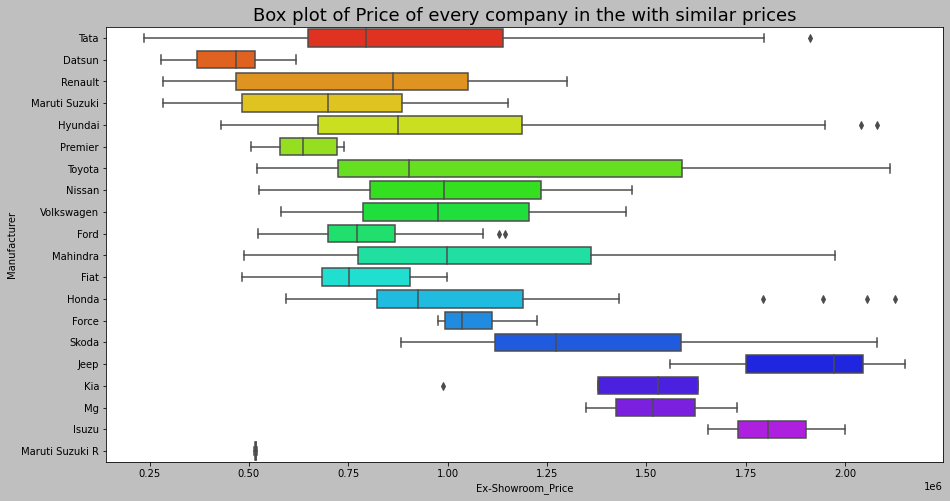

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(data=q, x='Ex-Showroom_Price', y='Make', palette='gist_rainbow')
plt.title('Box plot of Price of every company in the with similar prices',fontsize=18)
plt.ylabel('Manufacturer')


### now lets check how the things are varying with respective to clusters 

Text(0.5, 0, 'Horse power')

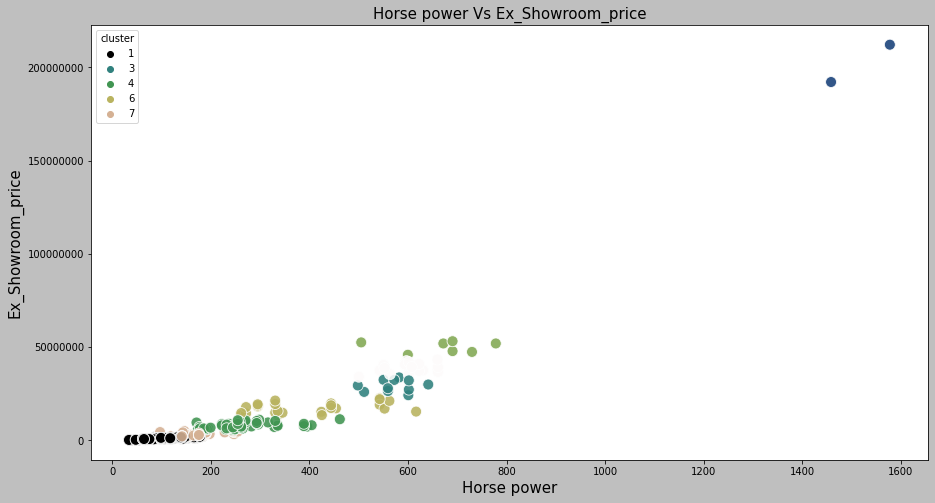

In [56]:
# Power vs ex showroom price with respective to clusters
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='Power',y='Ex-Showroom_Price',hue='cluster',palette='gist_earth',alpha=.89, s=120 );
plt.title('Horse power Vs Ex_Showroom_price',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Ex_Showroom_price',fontsize=15)
plt.xlabel('Horse power',fontsize=15)

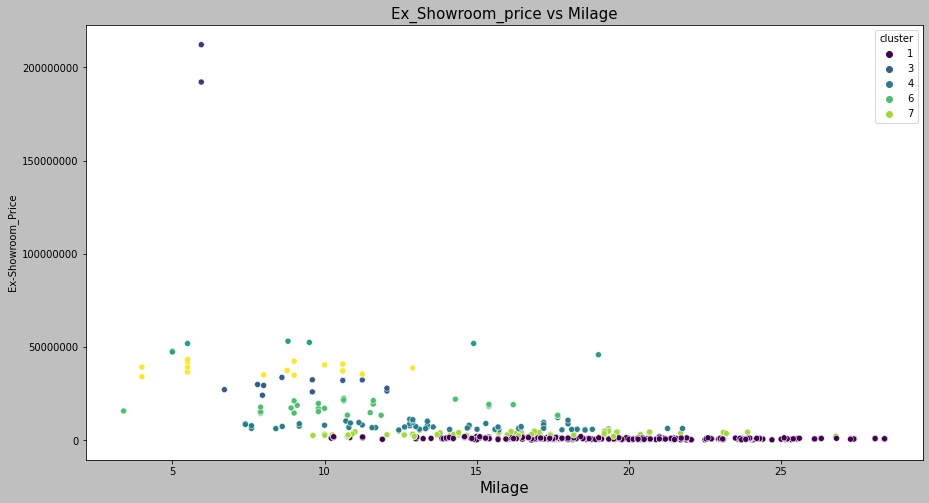

In [57]:
#Ex_Showroom_price vs Milage with respective to clusters
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='ARAI_Certified_Mileage',y='Ex-Showroom_Price',palette='viridis',hue='cluster')
plt.title('Ex_Showroom_price vs Milage',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Milage',fontsize=15);

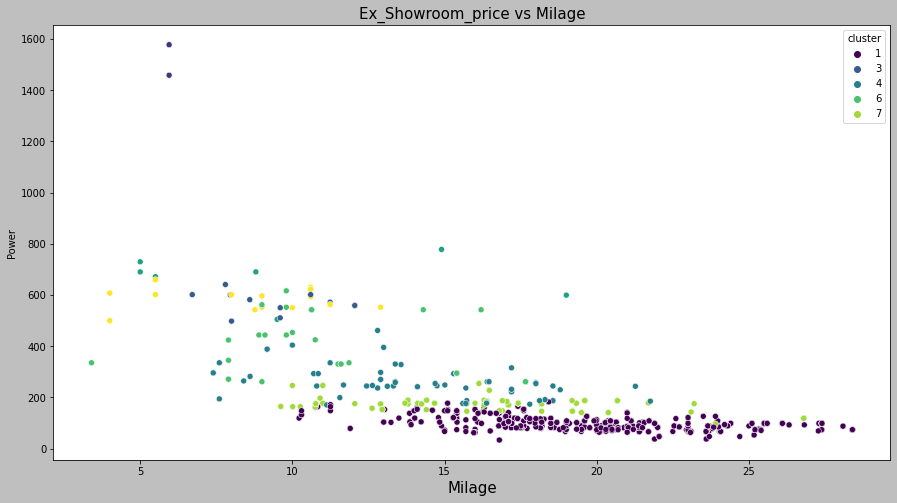

In [58]:
#power vs Milage with respective to clusters
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=fd, x='ARAI_Certified_Mileage',y='Power',palette='viridis',hue='cluster')
plt.title('Ex_Showroom_price vs power',fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Milage',fontsize=15);

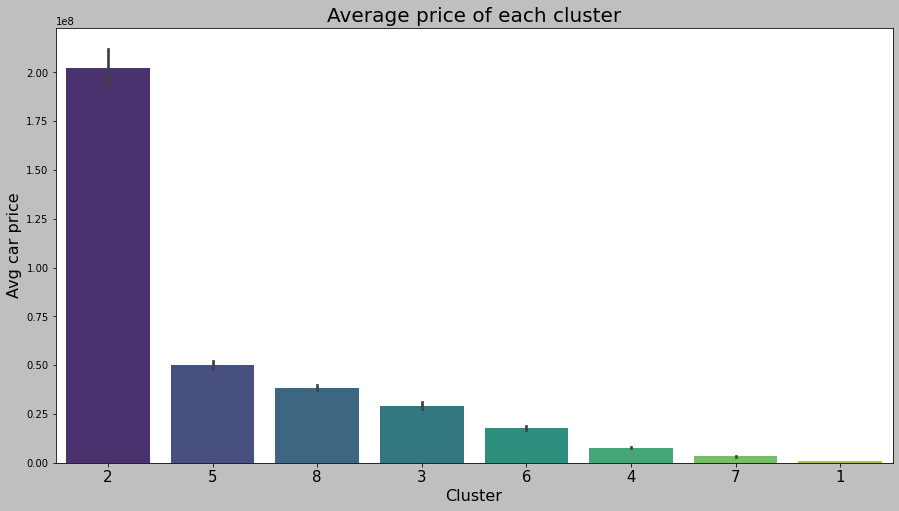

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(data=fd, x= 'cluster', y= 'Ex-Showroom_Price', palette='viridis',order=fd.groupby('cluster')['Ex-Showroom_Price'].mean().sort_values(ascending=False).index);

plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=15);

Text(0, 0.5, 'Number of cars')

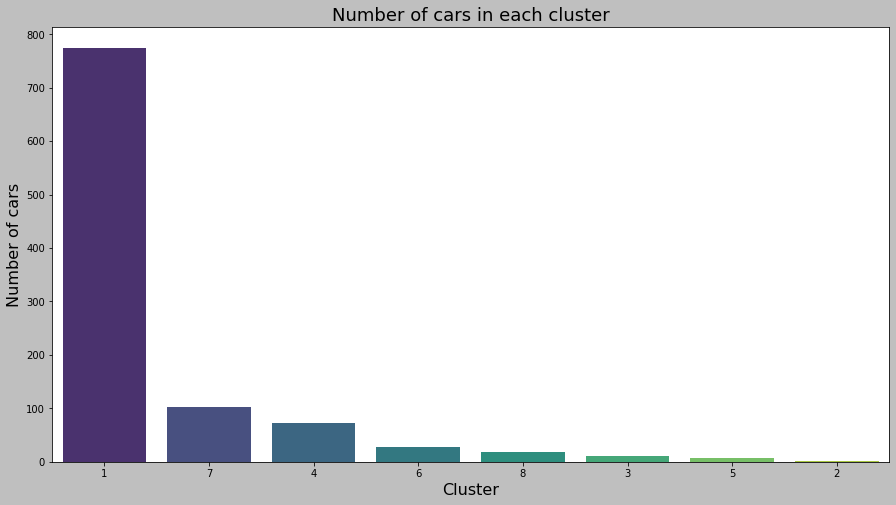

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(data=fd, x= 'cluster', palette='viridis',order=fd.cluster.value_counts().index);
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)


In [61]:
km.cluster_centers_

array([[1.98832774e+01, 9.54329990e+05, 1.42943484e+03, 3.79354839e+00,
        9.68805935e+01, 1.82461935e+02, 4.50422373e+01, 1.59817032e+03,
        4.11481677e+03, 1.73072774e+03, 4.70838710e+00, 5.39354839e+00,
        2.54739613e+03, 2.18451613e+00],
       [5.95000000e+00, 2.02149167e+08, 7.99300000e+03, 1.60000000e+01,
        1.51844000e+03, 1.53950000e+03, 5.09208713e+01, 1.21200000e+03,
        4.54400000e+03, 2.03800000e+03, 2.00000000e+00, 2.00000000e+00,
        2.71000000e+03, 6.00000000e+00],
       [9.47363636e+00, 2.93186242e+07, 5.10709091e+03, 9.27272727e+00,
        5.70631818e+02, 6.80909091e+02, 8.37272727e+01, 1.42736364e+03,
        4.72454545e+03, 2.08418182e+03, 3.00000000e+00, 3.36363636e+00,
        2.77645455e+03, 6.72727273e+00],
       [1.43272222e+01, 7.80041836e+06, 2.58945833e+03, 5.26388889e+00,
        2.59141944e+02, 4.59111111e+02, 7.07409180e+01, 1.62726389e+03,
        4.78252278e+03, 1.96092840e+03, 4.38888889e+00, 5.16666667e+00,
        2.869

In [62]:
km.inertia_

1122868705105835.1

In [63]:
## Machine learning model


In [64]:
originalFeatures=fd.columns
originalFeatures

Index(['Make', 'Model', 'Car', 'Variant', 'ARAI_Certified_Mileage',
       'Body_Type', 'Fuel_Type', 'Fuel_System', 'Type', 'Drivetrain',
       'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Power', 'Torque',
       'Fuel_Tank_Capacity', 'Height', 'Length', 'Width', 'Doors',
       'Seating_Capacity', 'Wheelbase', 'Number_of_Airbags', 'cluster'],
      dtype='object')

In [65]:
df_new=fd[['ARAI_Certified_Mileage',
       'Body_Type', 'Fuel_Type', 'Type',
       'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Power', 'Torque',
       'Fuel_Tank_Capacity', 'Height', 'Length', 'Width', 'Doors',
       'Seating_Capacity', 'Wheelbase', 'Number_of_Airbags']]
df_new

,ARAI_Certified_Mileage,Body_Type,Fuel_Type,Type,Ex-Showroom_Price,Displacement,Cylinders,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,23.60,Hatchback,Petrol,Manual,292667,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0
1,23.60,Hatchback,Petrol,Manual,236447,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0
3,21.90,Hatchback,Petrol,Automatic,334768,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0
4,23.60,Hatchback,Petrol,Manual,272223,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0
5,21.90,Hatchback,Petrol,Automatic,314815,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,25.10,Sedan,Diesel,Manual,1302000,1498.0,4.0,98.63,200.0,40.0,1495.0,4440.0,1695.0,4.0,5.0,2600.0,2.0
1272,25.10,Sedan,Diesel,Manual,1421000,1498.0,4.0,98.63,200.0,40.0,1495.0,4440.0,1695.0,4.0,5.0,2600.0,6.0
1273,22.60,Sedan,Petrol,Automatic,1431000,1497.0,4.0,117.37,145.0,40.0,1495.0,4440.0,1695.0,4.0,5.0,2600.0,6.0
1274,17.80,Sedan,Petrol,Automatic,1201000,1497.0,4.0,117.37,145.0,40.0,1495.0,4440.0,1695.0,4.0,5.0,2600.0,2.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor ,GradientBoostingRegressor 

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [67]:
for col in df_new.columns[1:]:
    if (df_new[col].dtype == 'object'):
        df_new = pd.get_dummies(df_new, columns=[col], prefix = [col])

In [68]:
from sklearn import preprocessing


# for col in list(df_new.columns[2:]):
#     if (df_new[col].dtype == 'int64') or (df_new[col].dtype == 'float64'):
#         x = np.array(df_new[col]) #returns a numpy array
#         x = np.reshape(x,(-1,1))
#         min_max_scaler = preprocessing.MinMaxScaler()
#         x_scaled = min_max_scaler.fit_transform(x)
#         df_new[col] = x_scaled

In [69]:
X=df_new.drop("Ex-Showroom_Price", axis=1)
y=df_new["Ex-Showroom_Price"]

In [70]:
#Encoding the categorical columns into numerical columns 
#cat_col=[col for col in X if X[col].dtype=="object" ] #get the cat col
#X=pd.get_dummies(X,columns=cat_col,drop_first=True) #using pandas function

#scaling all the columns 
#sc=StandardScaler()
#X=sc.fit_transform(X)
#X=pd.DataFrame(X)

In [71]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)
X

,ARAI_Certified_Mileage,Displacement,Cylinders,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,...,"Body_Type_Sports, Hatchback",Fuel_Type_CNG + Petrol,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Type_AMT,Type_Automatic,Type_CVT,Type_DCT,Type_Manual
0,23.60,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,...,0,0,0,0,1,0,0,0,0,1
1,23.60,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,...,0,0,0,0,1,0,0,0,0,1
3,21.90,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,...,0,0,0,0,1,0,1,0,0,0
4,23.60,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,...,0,0,0,0,1,0,0,0,0,1
5,21.90,624.0,2.0,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,25.10,1498.0,4.0,98.63,200.0,40.0,1495.0,4440.0,1695.0,4.0,...,0,0,1,0,0,0,0,0,0,1
1272,25.10,1498.0,4.0,98.63,200.0,40.0,1495.0,4440.0,1695.0,4.0,...,0,0,1,0,0,0,0,0,0,1
1273,22.60,1497.0,4.0,117.37,145.0,40.0,1495.0,4440.0,1695.0,4.0,...,0,0,0,0,1,0,1,0,0,0
1274,17.80,1497.0,4.0,117.37,145.0,40.0,1495.0,4440.0,1695.0,4.0,...,0,0,0,0,1,0,1,0,0,0


In [72]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (812, 39)
X_test shape:  (203, 39)
Y_train shape:  (812,)
Y_test shape:  (203,)


In [73]:
#evaluate and disply the performance of models
def evaluate(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test) 
    
   
    
    #printing the model name and accuracy !!!!!
    print("Model name: ",model)
    print("Model score : "+str(model.score(X_test, y_test) * 100))
    print("R2 score : ",r2_score(y_test,y_pred))
    print("MSE : ",mean_squared_error(y_test,y_pred))
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print("-------------------------------------------------------------")

In [74]:
X_train

,ARAI_Certified_Mileage,Displacement,Cylinders,Power,Torque,Fuel_Tank_Capacity,Height,Length,Width,Doors,...,"Body_Type_Sports, Hatchback",Fuel_Type_CNG + Petrol,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Type_AMT,Type_Automatic,Type_CVT,Type_DCT,Type_Manual
1072,17.36,1197.0,4.0,80.88,114.0,43.0,1520.0,3995.0,1660.0,4.0,...,0,0,0,0,1,0,1,0,0,0
415,18.15,1198.0,3.0,80.88,115.0,35.0,1655.0,3700.0,1735.0,5.0,...,0,0,0,0,1,0,0,0,0,1
895,25.50,1498.0,4.0,98.63,215.0,40.0,1525.0,3941.0,1704.0,5.0,...,0,0,1,0,0,0,0,0,0,1
251,19.20,1395.0,4.0,147.95,250.0,50.0,1416.0,4456.0,1796.0,4.0,...,0,0,0,0,1,0,1,0,0,0
527,15.70,1368.0,4.0,112.44,207.0,45.0,1487.0,4596.0,1730.0,4.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,20.14,1197.0,4.0,69.04,114.0,43.0,1520.0,3995.0,1660.0,4.0,...,0,0,1,0,0,0,0,0,0,1
338,10.63,3996.0,8.0,542.48,770.0,90.0,1432.0,5049.0,1937.0,4.0,...,0,0,0,0,1,0,1,0,0,0
1089,28.09,1248.0,4.0,87.78,200.0,43.0,1485.0,4490.0,1730.0,4.0,...,0,0,1,0,0,0,0,0,0,1
538,24.30,1248.0,4.0,88.77,200.0,48.0,1640.0,3995.0,1790.0,5.0,...,0,0,1,0,0,0,0,0,0,1


In [75]:
#Initialize the models 
lr=LinearRegression() #Linear regressor
lasso=LassoCV() #Lasso regression
R=RidgeCV() #Ridge regression
knn=KNeighborsRegressor() 
svr=SVR() # support vector regressor
dtr=DecisionTreeRegressor()

models=[lr,lasso,R,knn,svr,dtr] #create a list of models 

for model in models:
    evaluate(model)

Model name:  LinearRegression()
Model score : 94.41661430017646
R2 score :  0.9441661430017646
MSE :  14712238935919.68
MAE :  1723173.8310394366
-------------------------------------------------------------
Model name:  LassoCV()
Model score : 80.68674233112787
R2 score :  0.8068674233112788
MSE :  50890494895312.3
MAE :  2226358.6323537696
-------------------------------------------------------------
Model name:  RidgeCV()
Model score : 92.37690350037657
R2 score :  0.9237690350037657
MSE :  20086883329155.883
MAE :  1845665.9785107337
-------------------------------------------------------------
Model name:  KNeighborsRegressor()
Model score : 64.56373315500888
R2 score :  0.6456373315500887
MSE :  93374674946241.77
MAE :  1385666.7192118226
-------------------------------------------------------------
Model name:  SVR()
Model score : -4.639844042642949
R2 score :  -0.04639844042642949
MSE :  275726319215487.53
MAE :  3780554.9476694018
----------------------------------------------

In [76]:
score_list = []

for i in range(2,20):
    decreg = DecisionTreeRegressor(max_depth = i)
    decreg.fit(X_train, y_train)
    pre_tree = decreg.predict(X_test)
    r_sq = decreg.score(X_test, y_test)
    score_list.append(r_sq)

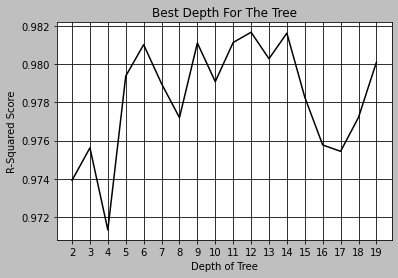

In [77]:
fig = plt.figure()
plt.plot(list(range(2,20)), score_list)
plt.title("Best Depth For The Tree")
plt.xticks(list(range(2,20)))
plt.ylabel("R-Squared Score")
plt.xlabel("Depth of Tree")
plt.grid()
plt.show()

In [78]:
decreg = DecisionTreeRegressor(max_depth = 11)
decreg.fit(X_train, y_train)
pre_tree = decreg.predict(X_test)
r_sq = decreg.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9762913351900575


In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dec_scores = cross_val_score(decreg, X_train, y_train, scoring='r2', cv=folds)

dec_sc = dec_scores.mean()

print("New Decision Tree Coefficient of Determination: ", dec_sc)


New Decision Tree Coefficient of Determination:  0.8175734511551646


In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = DecisionTreeRegressor(max_depth = 11), n_features_to_select=15)
x_rfe = rfe.fit_transform(X_train,y_train)

decreg.fit(x_rfe,y_train)              
temp = pd.Series(rfe.support_,index = X_train.columns)
selected_features_rfe = temp[temp==True].index
selected_features_rfe

Index(['ARAI_Certified_Mileage', 'Displacement', 'Power', 'Torque',
       'Fuel_Tank_Capacity', 'Height', 'Length', 'Width', 'Doors',
       'Seating_Capacity', 'Wheelbase', 'Number_of_Airbags', 'Body_Type_Sedan',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid'],
      dtype='object')

In [81]:
adj_r_sq = decreg.score(x_rfe, y_train)
print('Reduced Features Coefficient of Determination: ', adj_r_sq)

Reduced Features Coefficient of Determination:  0.9997241380514903


In [82]:
print('enter ARAI_Certified_Mileage   ')
ARAI_Certified_Mileage_input=float(input())
print('enter Displacement ')
Displacement_input=float(input())
print('enter Power  ')
Power_input=float(input())
print('enter Torque ')
Torque_input=float(input())
print('enter Fuel_Tank_Capacity  ')
Fuel_Tank_Capacity_input=float(input())
print('enter Height')
Height_input=float(input())
print('enter Length')
Length_input=float(input())
print('enter Width')
Width_input=float(input())
print('enter Doors ')
Doors_input=float(input())
print('enter Seating_Capacity')
Seating_Capacity_input=float(input())
print('enter Wheelbase')
Wheelbase_input=float(input())
print('enter Number_of_Airbags')
Number_of_Airbags_input=float(input())
print('enter Body_Type_Sedan 0 if no 1 if yes')
Body_Type_Sedan_input=float(input())
print('enter Fuel_Type_Diesel  0 if no 1 if yes')
Fuel_Type_Diesel_input=float(input())
print('enter Fuel_Type_Hybrid  0 if no 1 if yes')
Fuel_Type_Hybrid_input=float(input())


decreg.predict([[ARAI_Certified_Mileage_input,Displacement_input,Power_input,Torque_input,Fuel_Tank_Capacity_input,Height_input,Length_input,Width_input,Doors_input,Seating_Capacity_input,Wheelbase_input,Number_of_Airbags_input,Body_Type_Sedan_input,Fuel_Type_Diesel_input,Fuel_Type_Hybrid_input]])


enter ARAI_Certified_Mileage   
enter Displacement 
enter Power  
enter Torque 
enter Fuel_Tank_Capacity  
enter Height
enter Length
enter Width
enter Doors 
enter Seating_Capacity
enter Wheelbase
enter Number_of_Airbags
enter Body_Type_Sedan 0 if no 1 if yes
enter Fuel_Type_Diesel  0 if no 1 if yes
enter Fuel_Type_Hybrid  0 if no 1 if yes


array([562485.5])

In [83]:
print('Expected: ',decreg.predict([[ARAI_Certified_Mileage_input,Displacement_input,Power_input,Torque_input,Fuel_Tank_Capacity_input,Height_input,Length_input,Width_input,Doors_input,Seating_Capacity_input,Wheelbase_input,Number_of_Airbags_input,Body_Type_Sedan_input,Fuel_Type_Diesel_input,Fuel_Type_Hybrid_input]])[0])

Expected:  562485.5


In [87]:
#import pickle
#pickle_out=open("decreg.pkl","wb")
#pickle.dump(decreg,pickle_out)
#pickle_out.close()
from joblib import dump
dump(decreg,'decreg.joblib')

['decreg.joblib']